In [2]:
import numpy as np
import cv2
from IPython.display import display
import matplotlib.pyplot as plt
from skimage import io
from sklearn import cluster

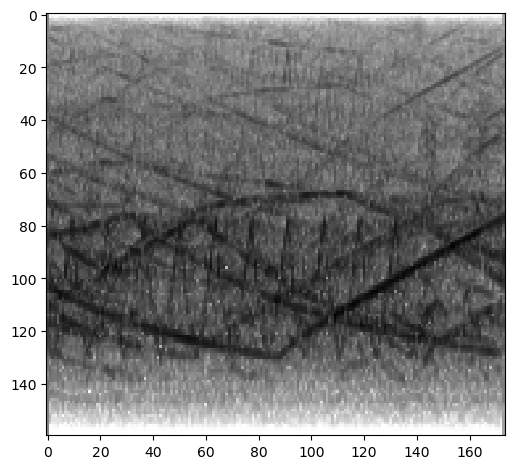

In [165]:
name="24347-8-0-8"
img = io.imread(f"Ground_truth/mel_spec_siren/{name}.png",as_gray=True)/255.0
h, w = img.shape
img2 = img.reshape(h*w,1)
img2 = np.float32(img2)
io.imshow(img)


In [166]:
# set number of colors
numcolors = 20

# do kmeans processing
kmeans_cluster = cluster.KMeans(n_clusters=int(numcolors))
kmeans_cluster.fit(img2)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

# need to scale result back to range 0-255
newimage = cluster_centers[cluster_labels].reshape(h, w)*255.0
newimage = newimage.astype('uint8')

# cv2.imwrite('Ground_truth/Annotation_mel_spec_siren/1-31482-A-42.png', res2)


In [185]:

# threshold to keep only middle gray values
lower = (0)
upper = (55)
thresh = cv2.inRange(newimage, lower, upper)

# get contours and corresponding areas and indices
cntrs_info = []
contours = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
index=0
for cntr in contours:
    area = cv2.contourArea(cntr)
    cntrs_info.append((index,area))
    index = index + 1


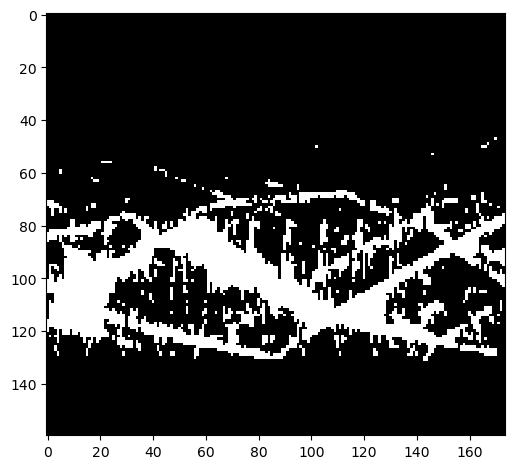

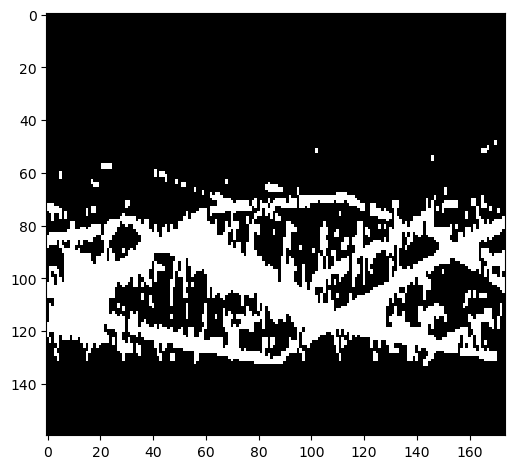

In [186]:
# sort contours by area
def takeSecond(elem):
    return elem[1]
cntrs_info.sort(key=takeSecond, reverse=True)

# # draw two largest contours as white filled on black background
result = np.zeros_like(newimage)
# index_first = cntrs_info[0][0]
# cv2.drawContours(result,[contours[index_first]],0,(255),-1)
# index_second = cntrs_info[1][0]
# print(index_first)
# cv2.drawContours(result,[contours[index_second]],0,(255),-1)
# print("Number of Contours found = " + str(len(contours)))
for n in range(len(contours)):
    cv2.drawContours(result, [contours[n]],0,(255),-1)
io.imshow(result)
io.show()
kernel = np.ones((2, 1),np.uint8)
kernel2 = np.ones((2, 2),np.uint8)
result = cv2.dilate(result,kernel,iterations = 1)
result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)
# result = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel2)

io.imshow(result)
io.show()

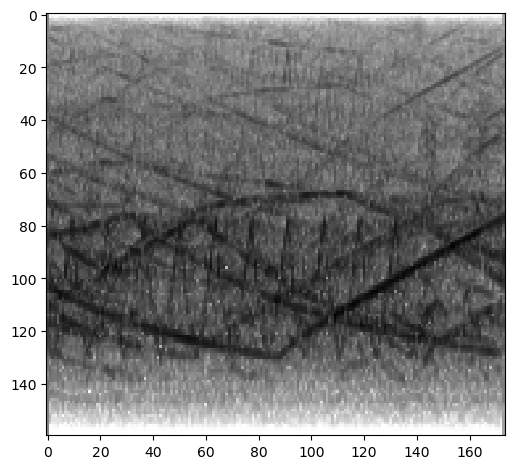

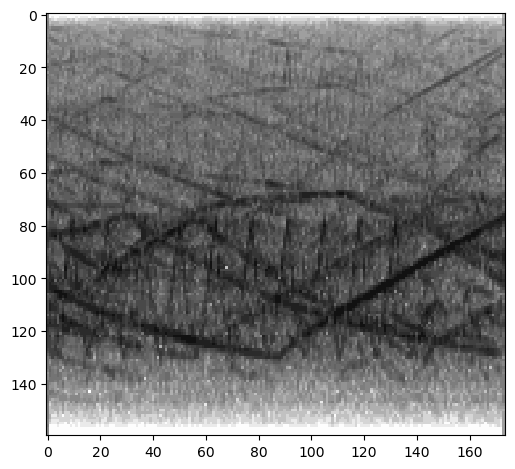

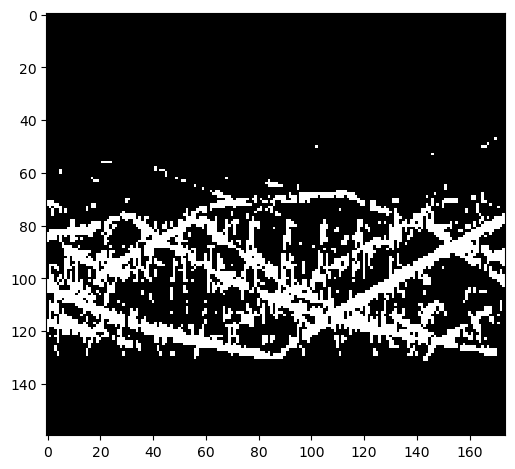

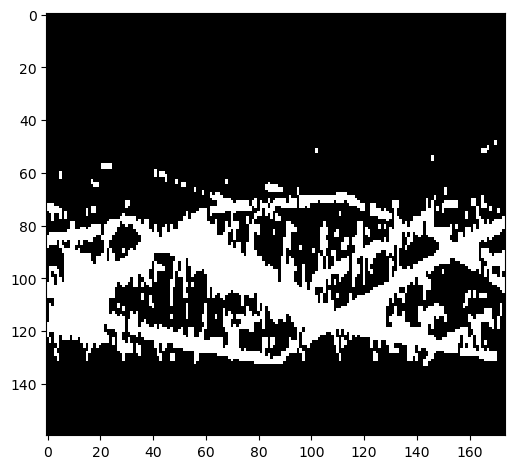

In [187]:
# display result
io.imshow(img)
io.show()
io.imshow(newimage)
io.show()
io.imshow(thresh)
io.show()
io.imshow(result)
io.imsave(f'Ground_truth/siren_mask/{name}.png', result)
io.show()
